# Astrocyte/Radial Glia

In [1]:
! pip install scanpy
! pip install scProject -U
import scProject
import scanpy as sc
patterns = sc.read_h5ad('patterns_anndata.h5ad')
dataset = sc.read_h5ad('test_target.h5ad')
dataset_filtered, patterns_filtered = scProject.matcher.filterAnnDatas(dataset, patterns, 'gene_id')

Requirement already up-to-date: scProject in /Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages (1.0.5)


/Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


(55371, 428) dataset filter shape
(80, 428) patterns filter shape


Perfrom a regression with .001 weight of regularization and 1% lasso to encourage as many features to show and then we can weed them out by increasing the amount of lasso and regularization

(55371, 80)
[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


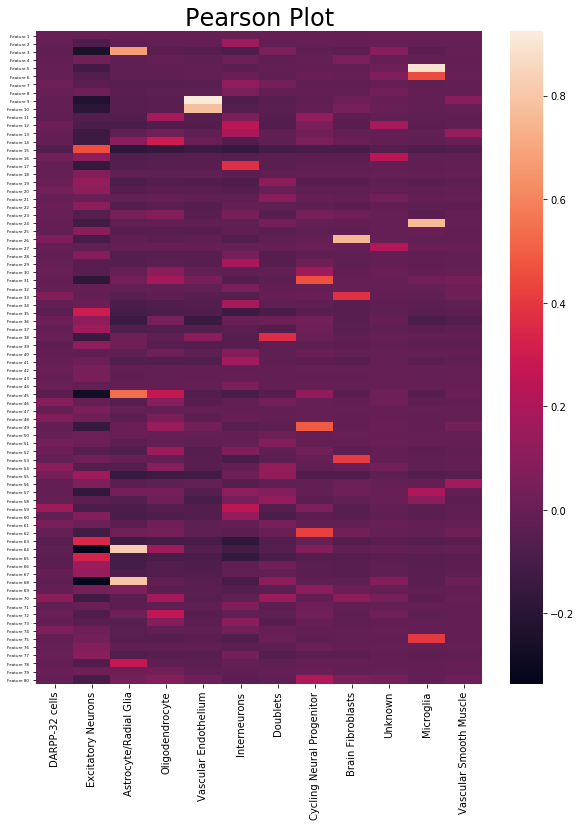

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= [10, 12]
scProject.rg.NNLR_ElasticNet(dataset_filtered, patterns_filtered, 'ARG01', .001, .01)
scProject.viz.pearsonMatrix(dataset_filtered, patterns_filtered, 'CellType', 12, 'ARG01', 'PearsARG01', True)


[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


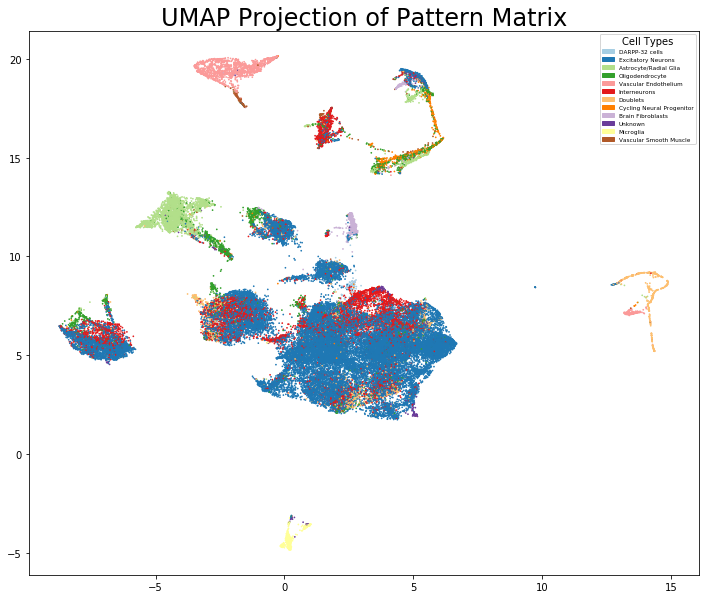

In [3]:
plt.rcParams['figure.figsize']= [12, 10]
scProject.viz.UMAP_Projection(dataset_filtered, 'CellType', 'ARG01', 'UMAPARG01', 20)

Number of nonzero cells 8722
Percentage of nonzero cells 15.751927904498745
Max coefficient 0.9942267
Average coefficient 0.030886507


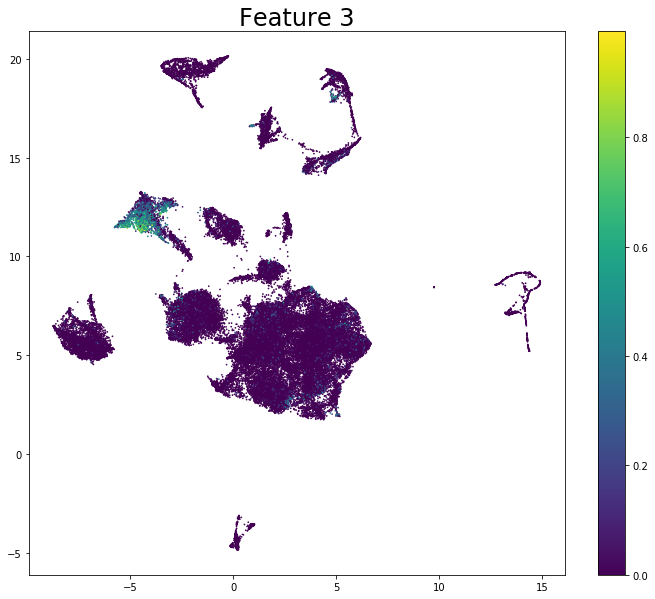

Number of nonzero cells 15164
Percentage of nonzero cells 27.38617687959401
Max coefficient 2.4527776
Average coefficient 0.105775446


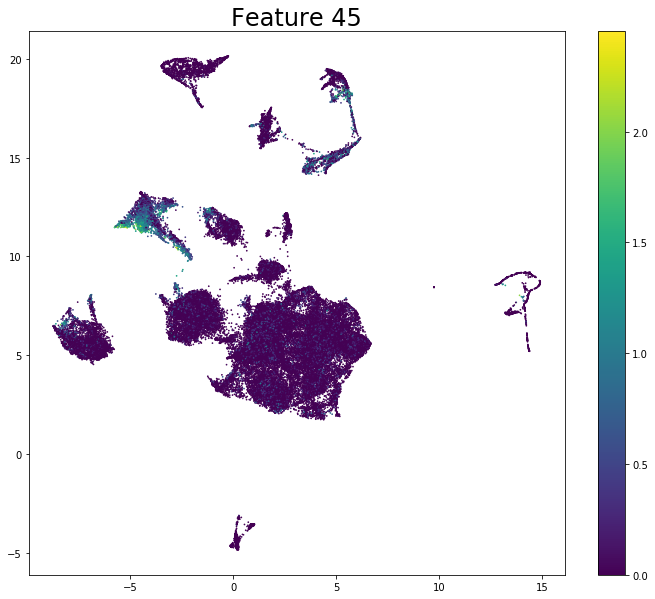

Number of nonzero cells 7737
Percentage of nonzero cells 13.973018367015225
Max coefficient 5.250846
Average coefficient 0.11929085


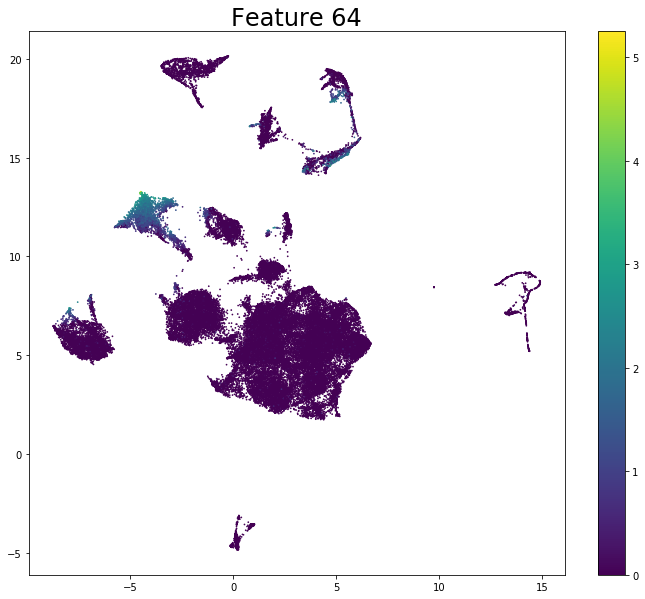

Number of nonzero cells 14025
Percentage of nonzero cells 25.32914341442271
Max coefficient 1.6029586
Average coefficient 0.08712153


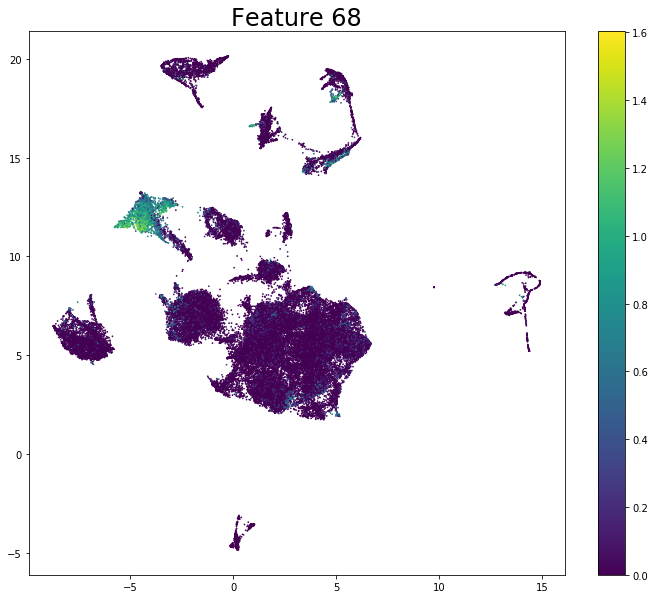

Number of nonzero cells 3654
Percentage of nonzero cells 6.599122284228207
Max coefficient 1.883195
Average coefficient 0.02171861


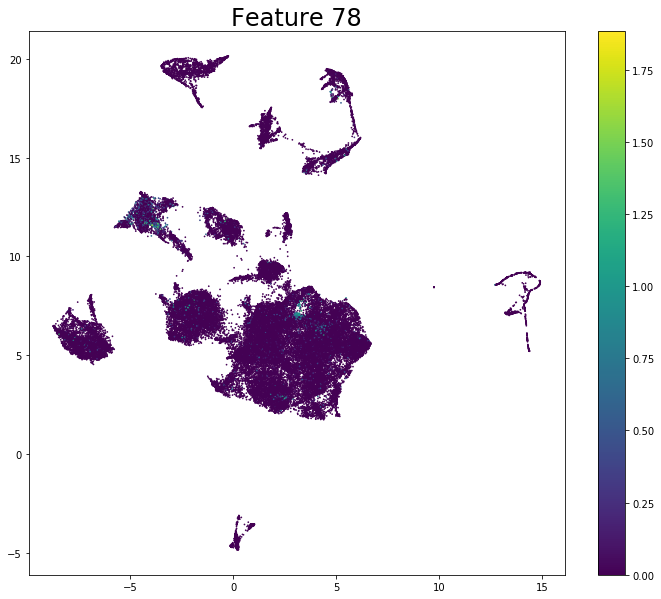

In [5]:
scProject.viz.featurePlots(dataset_filtered, [3, 45, 64, 68, 78], 'ARG01', 'UMAPARG01')

These features seem like very strong markers except for feature 78 as it also has the lowest pearson value. If we up the lasso we will be able to get a better sense of the strong features.

(55371, 80)
[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


/Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


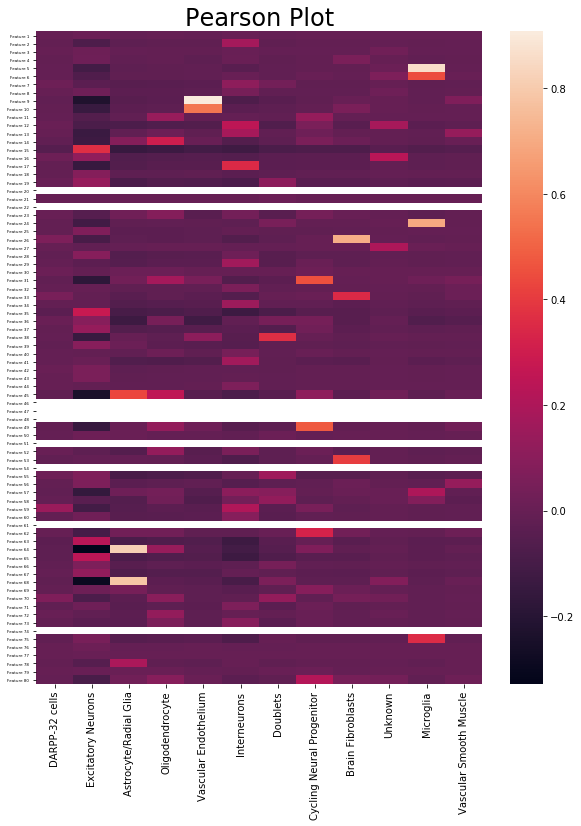

In [6]:
plt.rcParams['figure.figsize']= [10, 12]
scProject.rg.NNLR_ElasticNet(dataset_filtered, patterns_filtered, 'ARG99', .001, .99)
scProject.viz.pearsonMatrix(dataset_filtered, patterns_filtered, 'CellType', 12, 'ARG99', 'PearsARG99', True)


[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


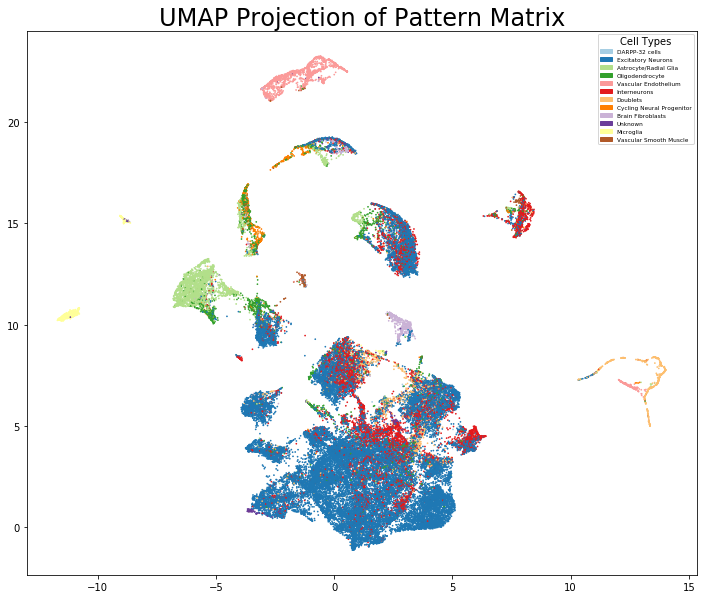

In [7]:
plt.rcParams['figure.figsize']= [12, 10]
scProject.viz.UMAP_Projection(dataset_filtered, 'CellType', 'ARG99', 'UMAPARG99', 20)

Number of nonzero cells 481
Percentage of nonzero cells 0.8686857741416988
Max coefficient 1.1829937
Average coefficient 0.0018319471


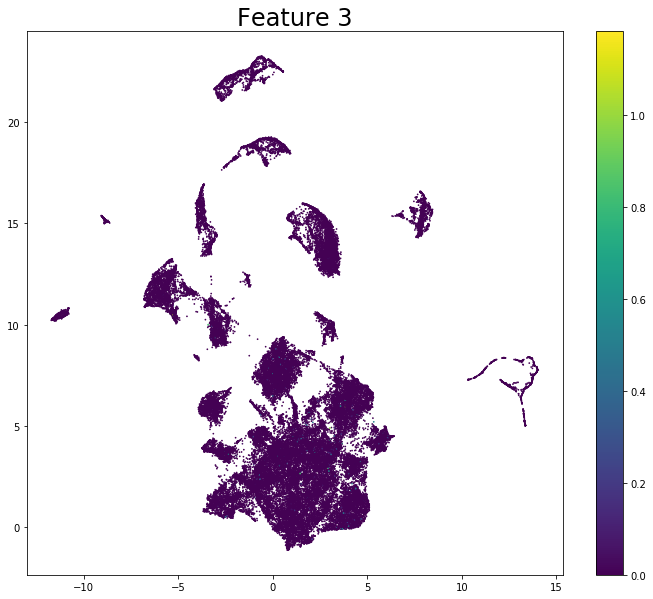

Number of nonzero cells 6626
Percentage of nonzero cells 11.96655288869625
Max coefficient 3.988595
Average coefficient 0.07494042


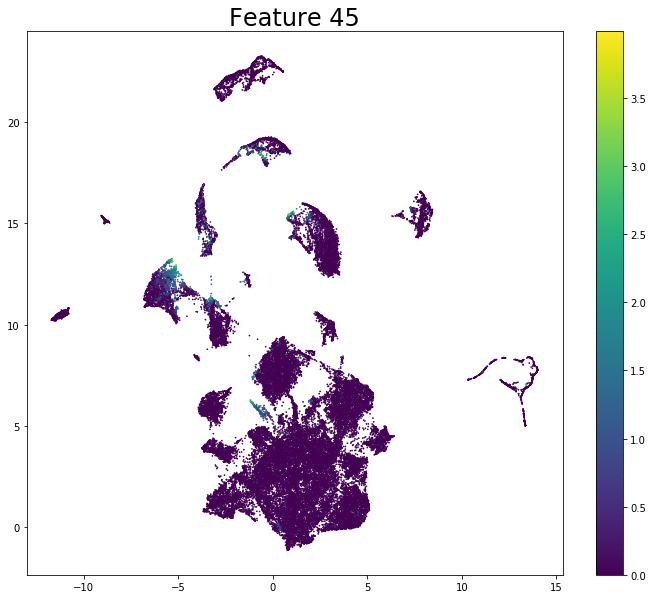

Number of nonzero cells 6983
Percentage of nonzero cells 12.611294721063373
Max coefficient 5.7546134
Average coefficient 0.12531555


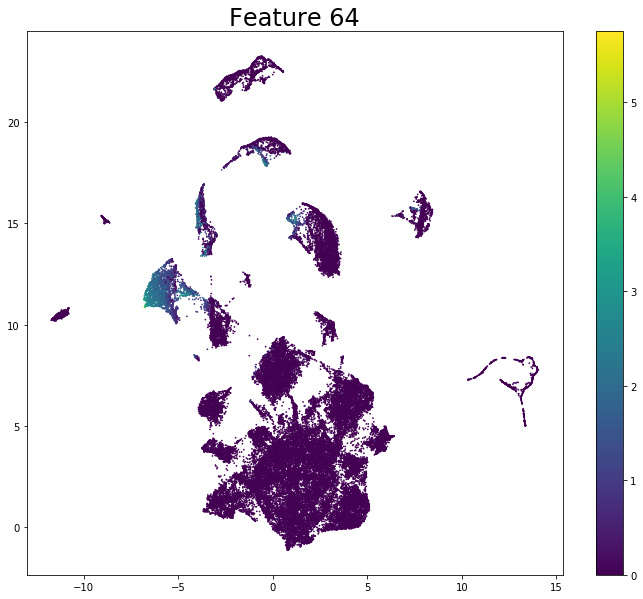

Number of nonzero cells 6947
Percentage of nonzero cells 12.546278737967528
Max coefficient 2.6933577
Average coefficient 0.08558596


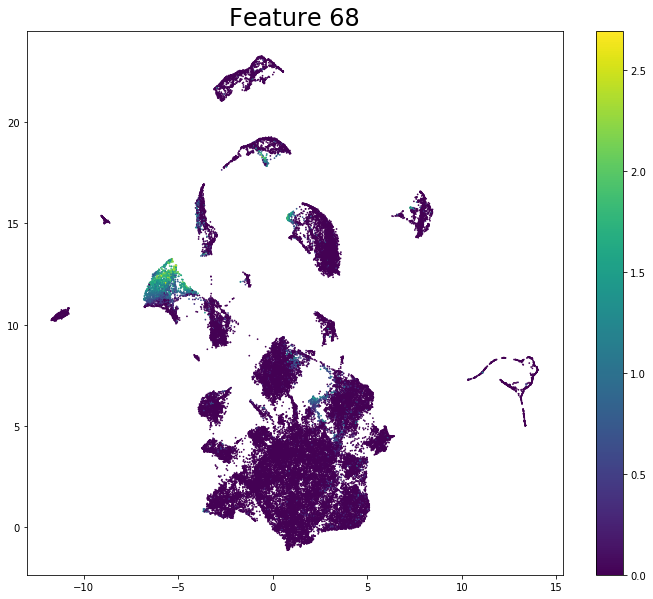

Number of nonzero cells 2133
Percentage of nonzero cells 3.8521969984287807
Max coefficient 2.128402
Average coefficient 0.015236465


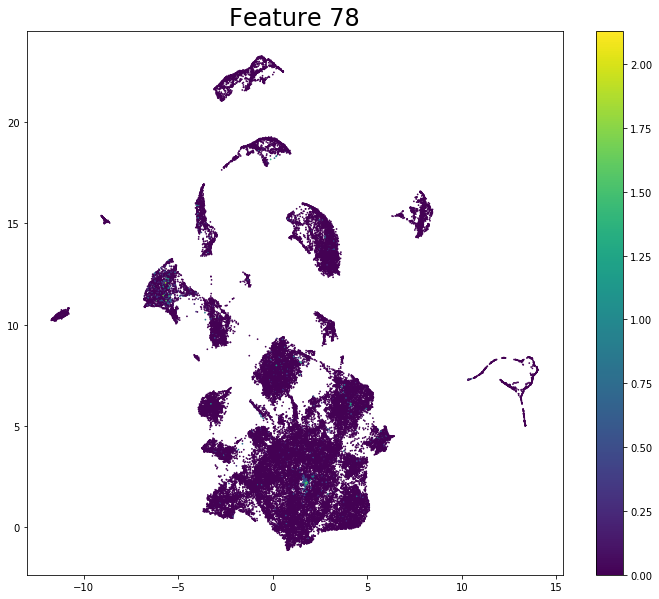

In [8]:
scProject.viz.featurePlots(dataset_filtered, [3, 45, 64, 68, 78], 'ARG99', 'UMAPARG99')

Features 3 and 78 clearly dropped out, which shows that while they may be expressed in astrocytes and radial glia they are not the core of the cell type as they are not as necessary in reconstructing the cell type as the other features that persisted. This is a perfect example of the model being forced to choose the most important features.

Lastly, lets up the regularization while keeping the lasso high to see what happens.

(55371, 80)
[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


/Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


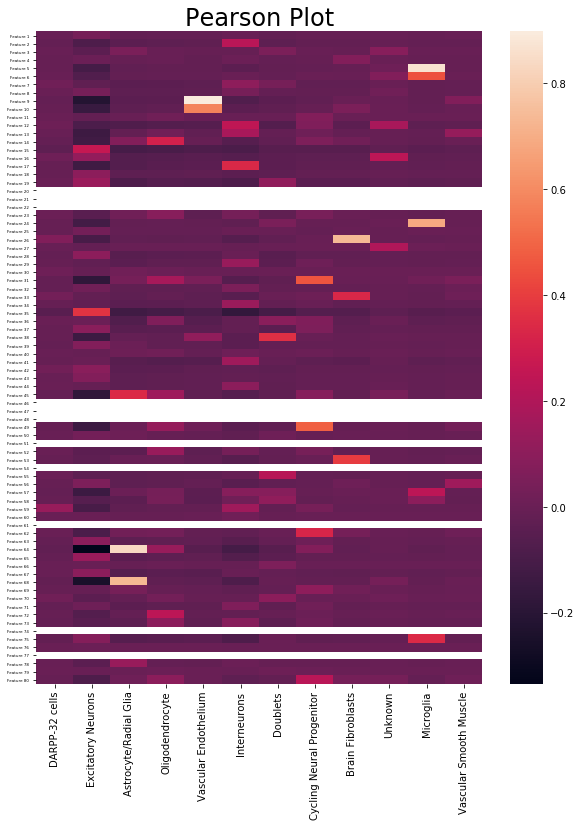

In [9]:
plt.rcParams['figure.figsize']= [10, 12]
scProject.rg.NNLR_ElasticNet(dataset_filtered, patterns_filtered, 'ARGHigh', .0025, .99)
scProject.viz.pearsonMatrix(dataset_filtered, patterns_filtered, 'CellType', 12, 'ARGHigh', 'PearsARGHigh', True)


[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


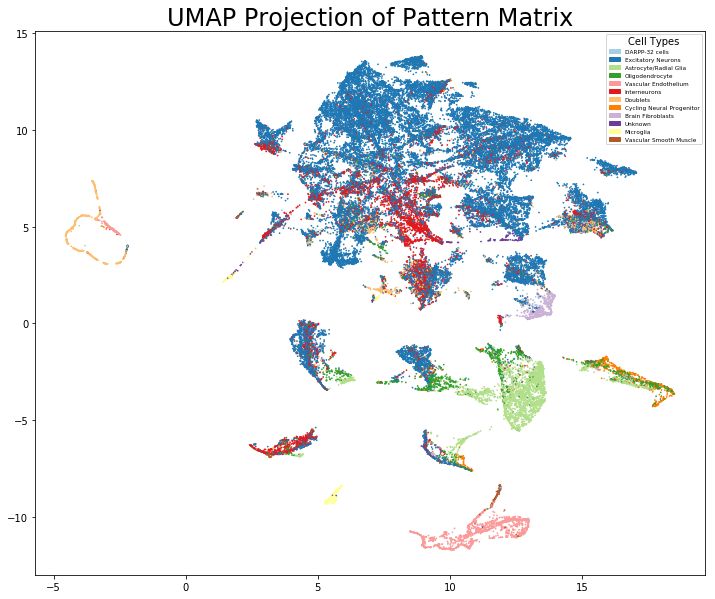

In [10]:
plt.rcParams['figure.figsize']= [12, 10]
scProject.viz.UMAP_Projection(dataset_filtered, 'CellType', 'ARGHigh', 'UMAPARGHigh', 20)

Number of nonzero cells 330
Percentage of nonzero cells 0.5959798450452403
Max coefficient 0.9795885
Average coefficient 0.0013455144


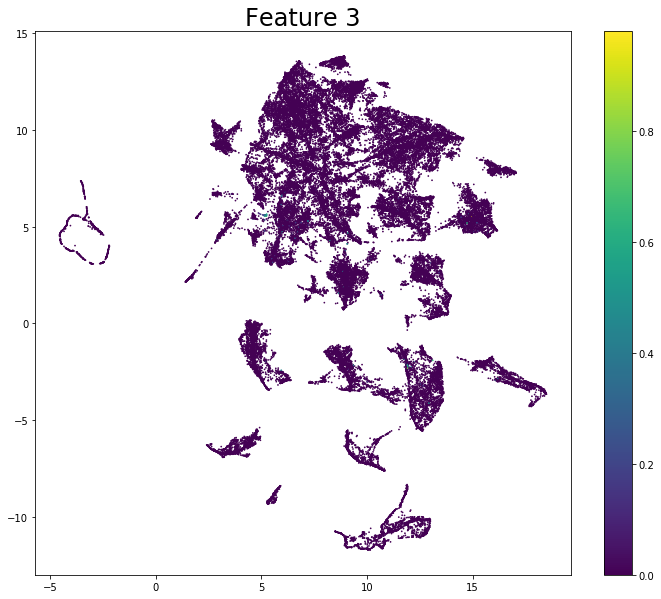

Number of nonzero cells 2243
Percentage of nonzero cells 4.050856946777194
Max coefficient 3.3564692
Average coefficient 0.025195424


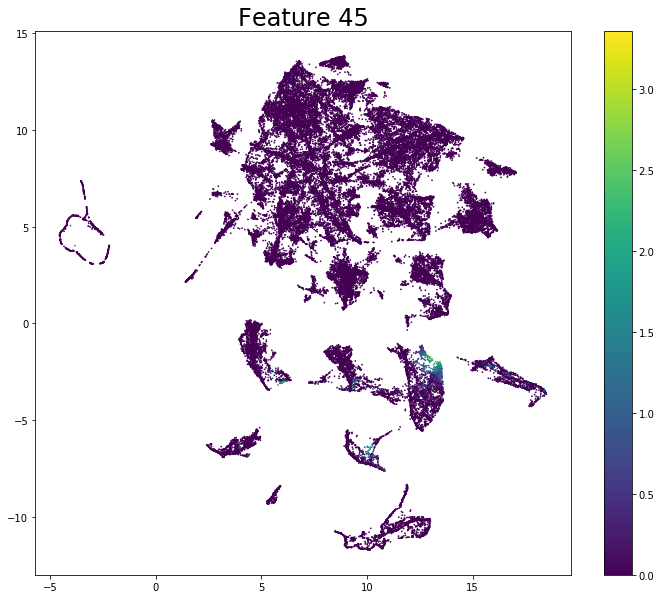

Number of nonzero cells 6483
Percentage of nonzero cells 11.70829495584331
Max coefficient 5.6277027
Average coefficient 0.12584415


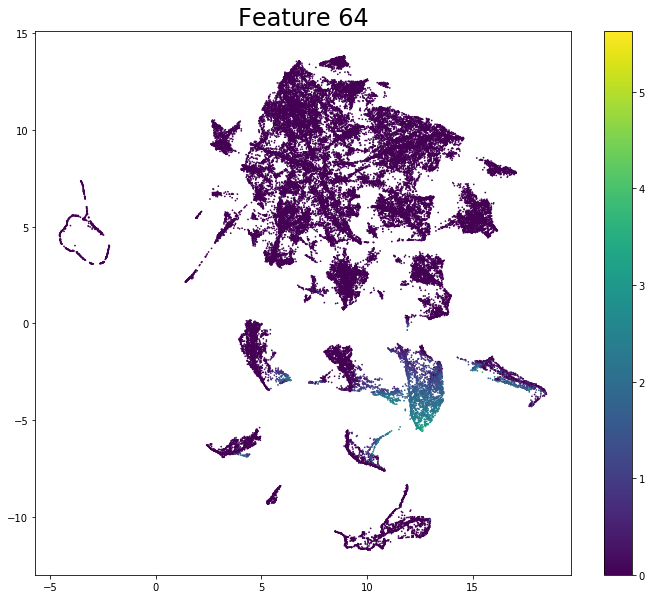

Number of nonzero cells 3371
Percentage of nonzero cells 6.088024417113651
Max coefficient 2.2001061
Average coefficient 0.042035248


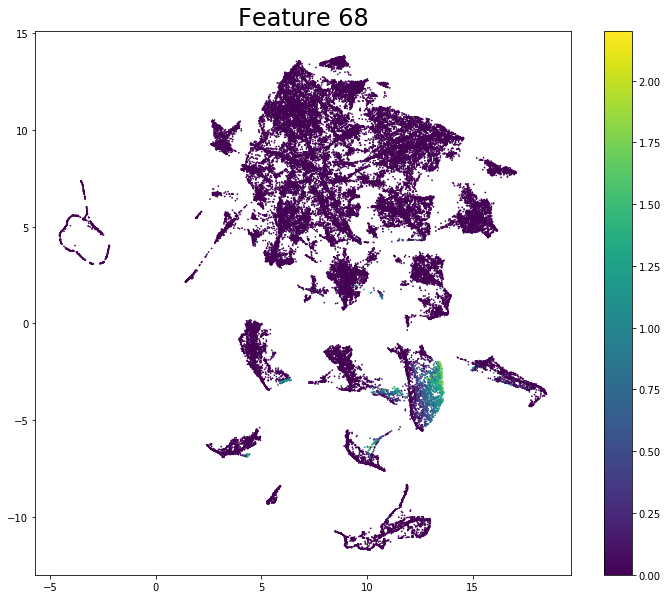

Number of nonzero cells 949
Percentage of nonzero cells 1.7138935543876757
Max coefficient 1.7724282
Average coefficient 0.005540804


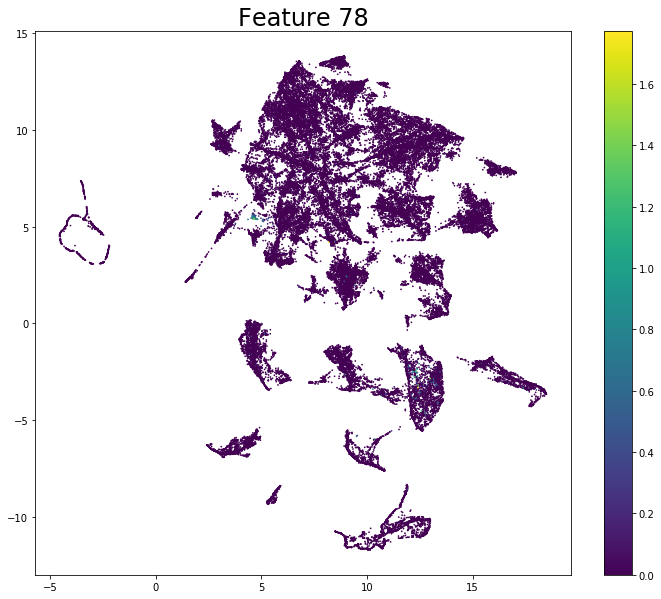

In [11]:
scProject.viz.featurePlots(dataset_filtered, [3, 45, 64, 68, 78], 'ARGHigh', 'UMAPARGHigh')

This clearly shows us that features 64 and 68 are the most robust markers of astrocytes/radial glia in the cortex. Lastly, let's check the highest expressed genes to understand the biology. Feature 45 plays a role so let's print those genes as well.

In [12]:
print(scProject.stats.importantGenes(patterns_filtered, 45, .1), "Feature 45 Genes")
print(scProject.stats.importantGenes(patterns_filtered, 64, .5), "Feature 64 Genes")
print(scProject.stats.importantGenes(patterns_filtered, 68, .3), "Feature 68 Genes")


[Index(['ENSMUSG00000026385', 'ENSMUSG00000027447', 'ENSMUSG00000092341'], dtype='object', name='index')] Feature 45 Genes
[Index(['ENSMUSG00000026385', 'ENSMUSG00000027447', 'ENSMUSG00000029838',
       'ENSMUSG00000000184', 'ENSMUSG00000000031'],
      dtype='object', name='index')] Feature 64 Genes
[Index(['ENSMUSG00000027447', 'ENSMUSG00000092341'], dtype='object', name='index')] Feature 68 Genes


Now these are ensemble ids so I just used https://www.syngoportal.org/convert.html to convert them to gene names.
Feature 45:
ENSMUSG00000027447	cystatin C
ENSMUSG00000026385	diazepam binding inhibitor
ENSMUSG00000092341	metastasis associated lung adenocarcinoma transcript 1 (non-coding RNA)

Feature 64:
ENSMUSG00000000184	cyclin D2
ENSMUSG00000027447	cystatin C
ENSMUSG00000026385	diazepam binding inhibitor
ENSMUSG00000000031	H19, imprinted maternally expressed transcript
ENSMUSG00000029838	pleiotrophin

Feature 68:
ENSMUSG00000027447	cystatin C
ENSMUSG00000092341	metastasis associated lung adenocarcinoma transcript 1 (non-coding RNA)

It is worth noting that all three features have cystatin C which is known to be expressed in astrocytes. Also, Diazepam binding inhibitor is known to be expressed in astrocytes. These features make sense that they would be expressed in astrocytes. 
